In [1]:
import pertpy as pt
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import random

Global seed set to 0


ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

To use sccoda or tasccoda please install ete3 with pip install ete3

In [2]:
# read anndata
adata = pt.dt.mcfarland_2020()
#adata = sc.read("adata_subset.h5ad")
# create metadata object
pt_metadata = pt.tl.CellLineMetaData()

In [3]:
random.seed(8)
random_sample = random.sample(range(adata.n_obs), 5000)
#subset the anndata (memory issue)
adata = adata[random_sample, :]
#adata.write("adata_subset.h5ad")

In [4]:
lookup = pt_metadata.lookup()

In [5]:
pt_metadata.annotate_cell_lines(adata)

AnnData object with n_obs × n_vars = 5000 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias', 'COSMICID', 'source', 'RRID', 'WTSI_Master_Cell_ID', 'sample_collection_site', 'primary_or_metastasis', 'primary_disease', 'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments', 'lineage', 'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype', 'default_growth_pattern', 'model_manipulation', 'model_manipulation_details', 'patient_i

In [6]:
# contains many NAs
lookup.bulk_rna_expression(query_id_list=adata.obs.cell_line.unique())
# pt_metadata.bulk_rna_sanger[pt_metadata.bulk_rna_sanger.index.isin(adata.obs.cell_line)]
# pt_metadata.annotate_bulk_rna_expression(adata, cell_line_source="sanger", query_id = "cell_line")

To summarize: in the RNA-Seq Data from sanger institute, you can find: 
1431 cell lines
37602 genes
Only model_name is allowed to use as `reference_id`
Default parameters to annotate bulk RNA expression: 
- query_id: cell_line_name
- cell_line_source: sanger
167 cell lines are not found in the metadata.
41 cell lines are found! 


In [7]:
pt_metadata.annotate_bulk_rna_expression(adata, cell_line_source="broad", query_id = "DepMap_ID")

To annotate bulk RNA expression data from Broad Institue,  If no `reference_id` is given, we use `DepMap_ID` as 
reference and query indentifier as default.  Please make sure that `DepMap_ID` is available in the adata.obs.  or 
use the `annotate_cell_lines()` function to annotate the cell line first

There are 208 identifiers in `adata.obs`.

Following 1 identifiers can't be found in bulk RNA expression data. 

Resulting in NA values for their corresponding metadata. Please check again: 
- ACH-000047

hi

AnnData object with n_obs × n_vars = 5000 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias', 'COSMICID', 'source', 'RRID', 'WTSI_Master_Cell_ID', 'sample_collection_site', 'primary_or_metastasis', 'primary_disease', 'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments', 'lineage', 'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype', 'default_growth_pattern', 'model_manipulation', 'model_manipulation_details', 'patient_i

In [8]:
pt_metadata.annotate_from_gdsc(adata)

Following 92 identifiers can not be found in the drug response data for GDSC1, their corresponding meta data are NA
values. Please check it again:
- 253J-BV
- RMUG-S
- Li-7
- KNS-81
- RERF-LC-Ad2
- MCAS
- Hs 294T
- BICR 31
- LMSU
- A-375
- KNS-60
- TCC-PAN2
- COV434
- SNU-840
- SNU-8
- Hey-A8
- MDA-MB-435S
- SW579
- OAW42
- LOX IMVI
- SW 480
- RERF-LC-Ad1
- UO-31
- HCT 116
- Panc 04.03
- JHOM-1
- GP2d
- NIH:OVCAR-3
- LU99
- SNU-C2A
- NCI-H157-DM
- PA-TU-8988S
- NCI-H2126
- DMS 273
- SNU-1041
- NCI-H322
- S-117
- CJM
- Malme-3M
- TEN
- SF-295
- JHOC-5
- SNU-1105
- IGROV1
- JHH-5
- T3M-4
- PANC-1
- YD-10B
- LUDLU-1
- L3.3
- FTC-238
- Hs 852.T
- YD-38
- 22Rv1
- SH-10-TC
- SNU-1214
- UM-UC-1
- SW 900
- BICR 6
- MIA PaCa-2
- WM-266-4
- SNU-1079
- VM-CUB1
- TUHR4TKB
- CCF-STTG1
- LS1034
- SNU-761
- 786-O
- Ishikawa (Heraklio) 02 ER-
- LNCaP clone FGC
- HEC-1-A
- HEC-1-B
- Sq-1
- Hep 3B2.1-7
- OVK18
- KP4
- SNU-685
- COLO 668
- RH-30
- HCC827
- SNU-1077
- WM1799
- HLF
- YD-15
- DV-90
- SNU-410
- SNU-245
- HCC-1195
- SNU-1076
- Hs 766T
- ACC-MESO-1
- COLO 829

AnnData object with n_obs × n_vars = 5000 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias', 'COSMICID', 'source', 'RRID', 'WTSI_Master_Cell_ID', 'sample_collection_site', 'primary_or_metastasis', 'primary_disease', 'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments', 'lineage', 'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype', 'default_growth_pattern', 'model_manipulation', 'model_manipulation_details', 'patient_i

In [9]:
# subset to data where bulk rna expression and viability is not na
viability = adata.obs.ln_ic50.values
not_na_viability = np.where(~np.isnan(viability))[0]
not_na_bulk = np.all(~np.isnan(adata.obsm['bulk_rna_expression_broad'].to_numpy()), axis=1)
not_na_bulk= np.where(not_na_bulk)[0]
not_na_both = np.intersect1d(not_na_bulk, not_na_viability)
not_na_bulk_array = adata.obsm['bulk_rna_expression_broad'].to_numpy()[not_na_both]
not_na_viability_array = viability[not_na_both]

In [10]:
data_train, data_test, label_train, label_test = train_test_split(not_na_bulk_array, 
                                                                  not_na_viability_array, test_size=0.3, random_state=42)

In [11]:
arc_witch = LinearRegression()
arc_witch.fit(data_train, label_train)
viability_predicted = arc_witch.predict(data_test)

Mean squared error: 26988695289363307692032.00
Coefficient of determination: -3242664945177707151360.00


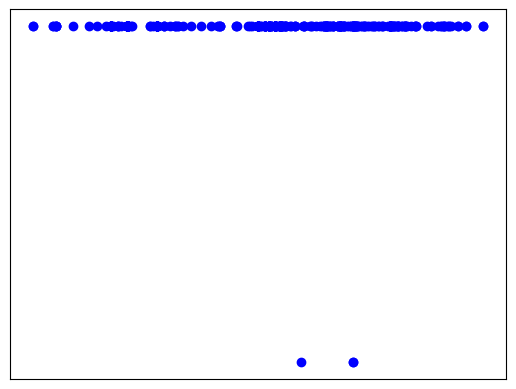

In [12]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(label_test, viability_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(label_test, viability_predicted))

# Visualisation
plt.scatter(label_test, viability_predicted, color="blue")
plt.xticks(())
plt.yticks(())
plt.show()

In [13]:
label_test

array([ 1.496437,  5.119752,  1.510912, -6.573166, -3.970363, -0.065858,
        0.090283,  1.471661,  0.27427 ,  0.884278,  4.736551,  3.649874,
        3.649874,  1.991376, -3.982747, -0.065858, -3.143784,  1.496437,
        2.228892,  2.754767,  0.090283,  1.513097,  1.980545, -1.41895 ,
        2.75128 ,  2.333514,  5.817101,  2.563735, -0.032709,  4.561328,
        3.458473,  3.279194,  0.53378 ,  3.361683,  0.090283, -3.947646,
       -4.413284, -0.177392, -3.143784,  4.922495, -0.369657,  2.258743,
        2.228892, -3.970363,  2.123688, -2.799777, -2.650056, -6.021765,
       -0.065858, -1.41895 ,  0.223879, -3.947646, -2.962764, -0.032709,
        0.090283,  3.237311,  1.810471, -0.065858,  3.925198, -3.346917,
       -3.982747,  5.342347,  0.373742, -3.143784, -1.41895 ,  0.223879,
        0.86221 ,  5.342347,  2.221291,  3.295255,  2.221291, -3.947646,
        0.244675,  3.557378, -0.065858,  1.605966, -0.605232, -4.413284,
        0.090782, -3.947646,  1.333509,  1.510912, 

In [14]:
viability_predicted

array([ 3.12500000e-01,  2.60937500e+00,  1.37500000e+00, -2.40625000e+00,
       -3.92187500e+00, -8.43750000e-01, -1.45312500e+00, -2.59375000e+00,
        1.43750000e+00,  9.21875000e-01,  3.23437500e+00, -2.50000000e-01,
       -2.50000000e-01,  1.81250000e+00, -8.12500000e-01, -8.43750000e-01,
       -3.56250000e+00,  3.12500000e-01, -1.74634549e+12,  2.60937500e+00,
       -1.45312500e+00,  7.96875000e-01, -8.12500000e-01,  2.00000000e+00,
       -4.68750000e-01,  2.15625000e+00,  4.50000000e+00, -1.59375000e+00,
        1.68750000e+00,  1.43750000e+00,  2.15625000e+00, -2.06250000e+00,
        1.40625000e-01, -2.23437500e+00, -1.45312500e+00, -4.35937500e+00,
       -4.51562500e+00, -1.34375000e+00, -3.56250000e+00, -4.68750000e-01,
       -9.84375000e-01,  1.43750000e+00, -1.74634549e+12, -3.92187500e+00,
       -1.85937500e+00, -1.18750000e+00, -1.87500000e-01, -3.84375000e+00,
       -8.43750000e-01,  2.00000000e+00, -4.68750000e-01, -4.35937500e+00,
       -1.34375000e+00,  

In [15]:
drug_response = pt_metadata.drug_response_gdsc1[pt_metadata.drug_response_gdsc1['cell_line_name'].isin(adata.obs.cell_line)]
drug_response = drug_response.pivot(index='cell_line_name', columns='drug_name', values='ln_ic50')
drug_response.head()

drug_name,(5Z)-7-Oxozeaenol,5-Fluorouracil,965-D2,993-D2,A-443654,A-770041,A-83-01,ACY-1215,AGI-6780,AICA Ribonucleotide,...,ZG-10,ZL049,ZL109,ZM447439,ZSTK474,Zibotentan,"eEF2K Inhibitor, A-484954",kb NB 142-70,rTRAIL,torin2
cell_line_name,,,,,,,,,,,,,,,,,,,,,
22RV1,2.473594,0.579534,3.072015,5.010936,NaN,NaN,5.299894,0.848553,2.072854,8.277564,...,2.216771,3.456567,0.704177,3.415833,-0.571660,5.886388,5.891054,2.989656,-0.586829,NaN
5637,1.626606,3.166983,4.410360,4.227483,NaN,NaN,3.847780,1.039981,1.127383,8.011505,...,NaN,2.053874,0.046212,0.556022,0.239659,5.144572,5.273391,2.519340,-2.889220,NaN
8505C,0.419249,2.447798,NaN,NaN,NaN,NaN,4.472385,1.684219,0.912301,7.954168,...,1.217821,3.422601,-2.121398,1.630272,1.115112,5.092384,5.443555,1.639219,-0.802009,-2.722521
A2058,NaN,5.144772,NaN,NaN,NaN,NaN,3.322242,3.517823,1.408728,7.617709,...,1.070022,2.570657,-1.714746,1.292062,1.100533,5.547936,5.373069,3.154308,-2.067882,NaN
A2780,0.485988,0.666625,2.868919,3.537939,NaN,NaN,3.167844,1.480489,0.765459,7.608179,...,1.119347,4.611726,-0.345197,3.646963,-0.909179,5.204600,5.302141,1.002677,-0.797652,NaN


In [16]:
# contains NA values, need imputation
imputer = SimpleImputer(strategy='mean')
drug_response_imputed = imputer.fit_transform(drug_response.values)
drug_response_imputed

array([[ 2.473594  ,  0.579534  ,  3.072015  , ...,  2.989656  ,
        -0.586829  , -2.62029729],
       [ 1.626606  ,  3.166983  ,  4.41036   , ...,  2.51934   ,
        -2.88922   , -2.62029729],
       [ 0.419249  ,  2.447798  ,  3.65231126, ...,  1.639219  ,
        -0.802009  , -2.722521  ],
       ...,
       [ 0.138006  ,  2.525089  ,  3.65231126, ...,  4.173171  ,
        -2.278326  , -2.493473  ],
       [ 2.100859  ,  2.097828  ,  3.65231126, ...,  6.357068  ,
        -3.193179  ,  2.188268  ],
       [ 0.428113  ,  3.185486  ,  3.930901  , ...,  2.697499  ,
         0.17049   , -2.62029729]])

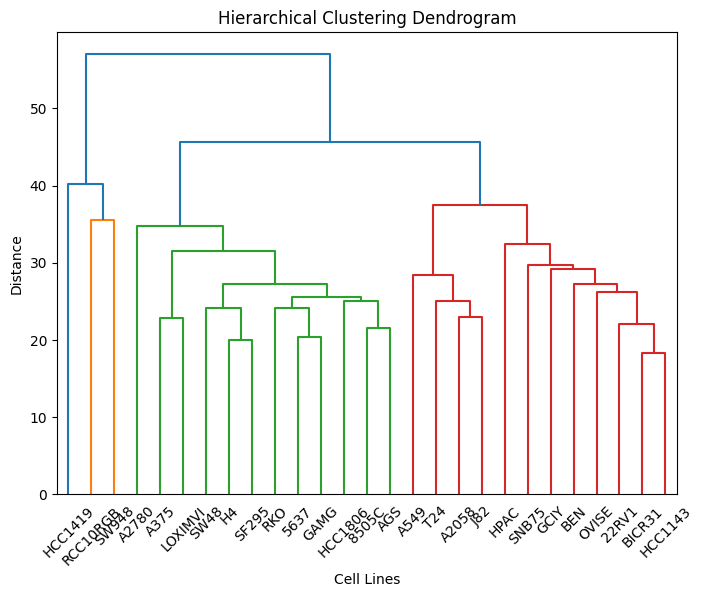

In [17]:
# Perform hierarchical clustering
hierach = hierarchy.linkage(drug_response_imputed, method='complete', metric='euclidean')
# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(hierach, labels=drug_response.index.values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cell Lines')
plt.ylabel('Distance')
plt.show()

In [18]:
cell_line_drug_response = pd.DataFrame()
cell_line_drug_response["cell_line_name"] = drug_response.index.values
cell_line_drug_response["cell_line_cluster"] = hierarchy.cut_tree(hierach, n_clusters=3).flatten()
cell_line_drug_response["cell_line_cluster"] = cell_line_drug_response["cell_line_cluster"].astype(str)

In [19]:
adata.obs = adata.obs.merge(cell_line_drug_response, how = "left")
adata.obs.cell_line_cluster = adata.obs.cell_line_cluster.fillna("3")
adata.obs['cell_line_cluster'] = "cell line cluster" + adata.obs['cell_line_cluster']
adata.obs.cell_line_cluster = adata.obs.cell_line_cluster.astype('category')

In [20]:
ccle_exp_gene_names = [gene_name.split(' (')[0] for gene_name in adata.obsm['bulk_rna_expression_broad'].columns.values]
ccle_exp_gene_names = np.array(ccle_exp_gene_names)
overlap_genes = np.intersect1d(ccle_exp_gene_names, adata.var.index.values)
overlap_gene_indices = np.where(np.isin(ccle_exp_gene_names, overlap_genes))[0]

In [21]:
# sorted coefficients of the overlapping genes in the dataset
coeffcient = {'coefficients': arc_witch.coef_[overlap_gene_indices], 'genes': ccle_exp_gene_names[overlap_gene_indices]}
coeffcient = pd.DataFrame(coeffcient)
coeffcient_sorted = coeffcient.reindex(coeffcient['coefficients'].abs().sort_values(ascending=False).index)
coeffcient_sorted = coeffcient_sorted.reset_index(drop=True)
coeffcient_sorted

,coefficients,genes
0,-1.043384e+13,TENM1
1,-1.018486e+13,MASP2
2,7.727102e+12,CREBBP
3,6.080640e+12,NFYA
4,-5.909414e+12,PAX6
...,...,...
17841,0.000000e+00,TAS2R16
17842,0.000000e+00,LCE3C
17843,0.000000e+00,DEFB110
17844,0.000000e+00,KRTAP20-1


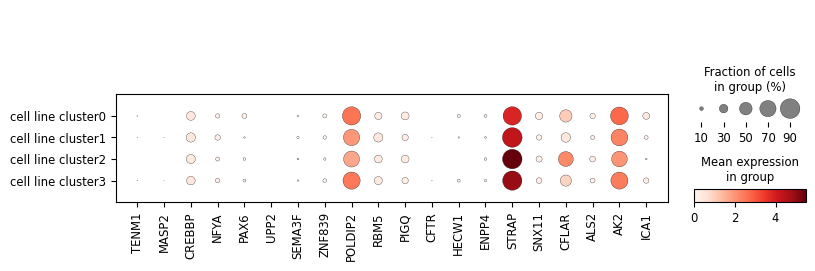

In [22]:
sc.pl.dotplot(adata, var_names = coeffcient_sorted.genes.values[0:20], groupby = 'cell_line_cluster')

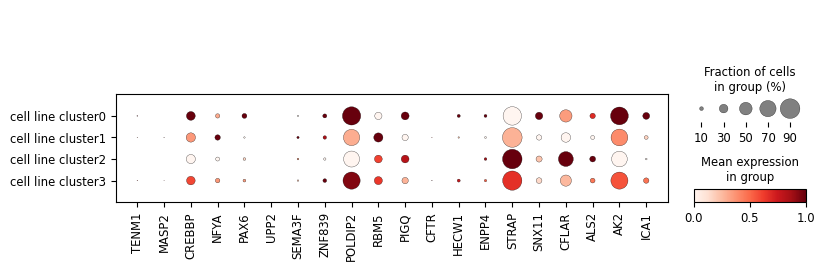

In [23]:
sc.pl.dotplot(adata, var_names = coeffcient_sorted.genes.values[0:20], groupby = 'cell_line_cluster', standard_scale='var')

In [24]:
#second plot

In [25]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [26]:
adata.obs['DepMap_ID'] = adata.obs['DepMap_ID'].astype('category')
adata_control = adata[adata.obs.perturbation == 'control']
adata_control.obs.reset_index(drop=True, inplace=True)

In [27]:
base_line_expression = pd.DataFrame(columns=adata_control.var_names, index=adata_control.obs['DepMap_ID'].cat.categories)                                                                                                 
for cl in adata_control.obs.DepMap_ID.cat.categories: 
    base_line_expression.loc[cl] = adata_control[adata_control.obs['DepMap_ID'] == cl].X.mean(0)
base_line_expression.reset_index(inplace=True)
base_line_expression = pd.melt(base_line_expression, id_vars='index', var_name='Gene', value_name='Value')
base_line_expression.columns = ['Cell line', 'Gene', 'base']
base_line_expression.head()

,Cell line,Gene,base
0,ACH-000001,MIR1302-10,0.0
1,ACH-000012,MIR1302-10,0.0
2,ACH-000015,MIR1302-10,0.0
3,ACH-000021,MIR1302-10,0.0
4,ACH-000022,MIR1302-10,0.0


In [28]:
ccle_exp_gene = pt_metadata.bulk_rna_broad
ccle_exp_gene.columns = [gene_name.split(' (')[0] for gene_name in ccle_exp_gene.columns.values]
ccle_exp_gene = ccle_exp_gene.reset_index()
ccle_exp_gene = pd.melt(ccle_exp_gene, id_vars='index', var_name='Gene', value_name='Value')
ccle_exp_gene.columns = ['Cell line', 'Gene', 'broad']
compare_cl_expr = base_line_expression.merge(ccle_exp_gene, how = "inner")
compare_cl_expr.head()

,Cell line,Gene,base,broad
0,ACH-000001,OR4F5,0.0,0.0
1,ACH-000012,OR4F5,0.0,0.0
2,ACH-000015,OR4F5,0.0,0.0
3,ACH-000021,OR4F5,0.0,0.0
4,ACH-000022,OR4F5,0.0,0.0


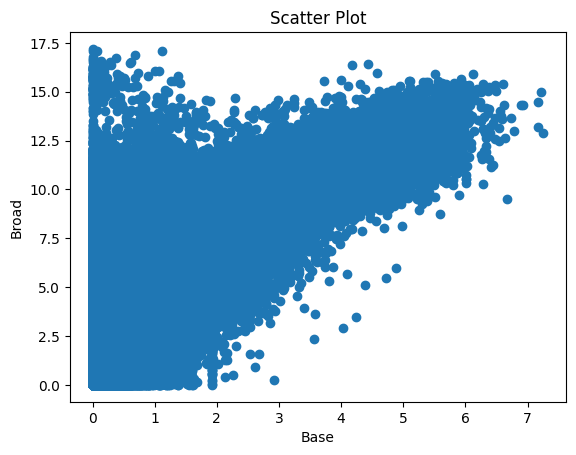

In [29]:
# Create scatter plot
plt.scatter(compare_cl_expr.base, compare_cl_expr.broad)

# Set labels and title
plt.xlabel('Base')
plt.ylabel('Broad')
plt.title('Scatter Plot')

# Display the plot
plt.show()